<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/computer-arithmetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Arithmetics and Round-off Methods

Actividades: https://classroom.github.com/a/2v-HnNqn

In a symbolic computation programs, implemented in SymPy or Mathematica for example, operatios like $1/3+4/3=5/3$, $2\times 3/4 = 3/2$, $(\sqrt{2})^2 = 2$ are unambiguously defined, However, when one numerical programming languages are used to represent numbers in a computer, this is no longer true. The main reason of this is the so-called *finite arithmetic*, what is the way in which a numerical computer programs performs basic operations. Some features of *finite arithmetic* are stated below:

- Only integer and rational numbers can be exactly represented.
- The elements of the set in which arithmetic is performed is necessarily finite.
- Any arithmetic operation between two or more numbers of this set should be another element of the set.
- Non-representable numbers like irrational numbers are approximated to the closest rational number within the defined set.
- Extremely large numbers produce overflows and extremely small numbers produce underflows, which are taken as null.
- Operations over non-representable numbers are not exact.

In spite of this, defining adequately the set of elements in which our computer will operate, round-off methods can be systematically neglected, yielding correct results within reasonable error margins. In some pathological cases, when massive iterations are required, these errors must be taken into account more seriously.

- - - 

- [Binary machine numbers](#Binary-machine-numbers)
    - [Single-precision numbers](#Single-precision-numbers)
    - [Double-precision numbers](#Double-precision-numbers)
- [Finite Arithmetic](#Finite-Arithmetic)
    - [Addition](#Addition)
    - [Multiplication](#Multiplication)

- - - 

## More About Float Values 
See also [here](https://www.inferentialthinking.com/chapters/04/1/Numbers.html)

In Python a float only represents 15 or 16 significant digits for any number; the remaining precision is lost. This limited precision is enough for the vast majority of applications.

In the next evaluation extra digits are discarded before any arithmetic is carried out.

In [1]:
0.6666666666666666 - 0.6666666666666666123456789

0.0

After combining float values with arithmetic, the last few digits may be incorrect. Small rounding errors are often confusing when first encountered. For example, the expression `2**0.5` computes the square root of `2`, but squaring this value does not exactly recover `2`.

In [44]:
2**0.5

1.4142135623730951

In [45]:
(2**0.5)**2

2.0000000000000004

In [46]:
(2**0.5)**2 - 2

4.440892098500626e-16

## Binary machine numbers

We will obtain the general algorithm to obtain the binary r

### Integers

From [here](https://www.techcareerbooster.com/blog/binary-representation-of-an-integer): If you recall your mathematics, then it will be easy for you to find out how we turn an integer number to its binary representation. Let's take for example the number 47. (see '//' operator [here](https://stackoverflow.com/a/1535601))


1. We divide 47 by 2. The quotient is `int(47//2) → 23` and the remainder is `47%2 → 1`
2. We divide the quotient of the previous step by 2. The new quotient is `int(23//2) → 11` and the remainder is `23%2 → 1`.
3. We divide the quotient of the previous step by 2. The new quotient is `int(11/2) → 5` and the remainder is `11%2 → 1`.
5. We divide the quotient of the previous step by 2. The new quotient is `int(5//2) → 2` and the remainder is `5%2 → 1`.
6. We divide the quotient of the previous step by 2. The new quotient is `int(2//2) → 1` and the remainder is `2%2 → 0`.
7. We divide the quotient of the previous step by 2. The new quotient is `int(1//2) → 0` and the remainder is `1%2 → 1`
8. We stop here, when the last quotient is `1//2→0`.

Then, the binary representation is the series of __1__s and __0__s of the remainders, taken in reverse order to the one produced, from latest to earliest: __101111__.
<!-- https://www.geeksforgeeks.org/bin-in-python/ -->

__Activity__: Implement a function that get the binary representation of an integer. 

__Activity__: Return as a string with 8 charactes completed with leading zeroes. Use the string method: `.rjust(8,"0")`

__Activity__ Write your function in the following format

In [22]:
#!/usr/bin/env python3   #Dice en dónde se encuentra el intérprete del programa.
def mybin(x):
    print('__name__ = {}'.format(__name__))
    #Write your code here and change the next line as required
    return bin(x)[2:].rjust(8, "0")
if __name__=='__main__':
    n=input('Escriba un entero:\n')   #Parte principal del programa (donde la función se usa).
    b=mybin(int(n))
    print('Su representación binaria es: {}'.format(b))

Escriba un entero:
47
__name__ = __main__
Su representación binaria es: 00101111


The advantage of this standard format is that can be used directly as a python module, because in that case the variable `__name__` evaluates to the name
of the function. To check this, we first use a cell of the notebook just as a editor with the Jupyter magic function `%%writefile`

In [38]:
%%writefile mybin.py   
#!/usr/bin/env python3
def mybin(x):
    print('__name__ = {}'.format(__name__))
    return bin(x)[2:].rjust(8, "0")
if __name__=='__main__':
    n=input('Escriba un entero;\n')
    b=mybin(int(n))
    print('Su representación binaria es: {}'.format(b))
#Crea un archivo en el disco duro de mi computador

Overwriting mybin.py


In [45]:
import mybin as mb
#Ejecuto el programa cargándolo como un módulo de python.
print(mb.mybin(5))
#Ahora __name__ = mybin. Por tanto la segunda parte del código se ignora completamente (su ejecución). 
#Con esto se permite usar como un programa o como un módulo. Ya que inicialmente es un programa, pero gracias a 
#if __name__=='__main__' (que cambia cuando 'invocamos' al programa como un módulo) la ejecución de este 
#se descarta si deseamos usar a la función del código como un módulo.

__name__ = mybin
00000101


We now can use the full contents of the file as an usual python module, it it is
in the working directory

In [46]:
import mybin
mybin.mybin(45)

__name__ = mybin


'00101101'

while here, or in a terminal:

In [52]:
__name__

'__main__'

The binary representation of a float in 32 bits done by the following steps

In [ ]:
bin(47)

'0b101111'

The format is not the standard one. We need dropt the firs '0b'

In [ ]:
bin(47)[2:]

'101111'

We must enforce the 8 bits representation by padding any additional leading zeroes

In [ ]:
bin(47)[2:].rjust(8, '0')

'00101111'

To convert a binary into the integer we can use the `int` function with `base=0` upont the proper Python formatted string, starting with: <font color='red'>`0b`</font>

In [ ]:
int('0b101111',base=0)

47

or with any number of padding zeroes in between

In [ ]:
int('0b0000000101111',base=0)

47

### Activity solution

In [60]:
#!/usr/bin/env python3
def binario(n):
    nbin=''
    while n!=0:
        nbin=str(n%2)+nbin
        n=int(n//2)
    return(nbin.rjust(8,"0"))
if __name__=='__main__':   
    N=input('Escriba un entero:\n')
    B=binario(int(N))
    print('Su representación binaria es: {}'.format(B))

Escriba un entero:
45
Su representación binaria es: 00101101


In [56]:
%%writefile binario.py   
#!/usr/bin/env python3
def binario(n):
    print('__name__ = {}'.format(__name__))
    nbin=''
    while n!=0:
        nbin=str(n%2)+nbin
        n=int(n//2)
    return(nbin.rjust(8,"0"))
if __name__=='__main__':   
    N=input('Escriba un entero:\n')
    B=binario(int(N))
    print('Su representación binaria es: {}'.format(B))

Overwriting binario.py


In [61]:
import binario as bn
bn.binario(45)

__name__ = binario


'00101101'

In [59]:
bin(45)

'0b101101'

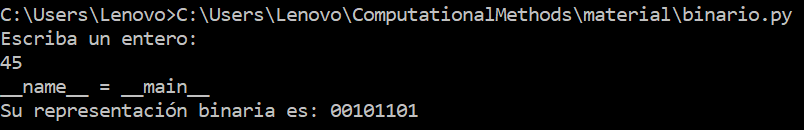

### Floats
Floats in 32 bits are representated trough 4 8-bit integers.

The processes of obtain the binary representation for a float can be complicated because the design used to really  store the number  in one specific programming language like Python. In fact, from https://stackoverflow.com/a/16444778/2268280:

* To obtain the four integers associated to a real number we need first to ask for the packed structure : `'!'`, in 32 bits: `'f'`, with the full string `'!f'` as

In [63]:
import struct   #Módulo struct
packed=struct.pack('!f',0.15625)   #Método pack del módulo struct.
packed   #Así es como se almacena internamente el número 0.15625 en memoria RAM. Está comprimido (empaquetado) para 
#asegurar la velocidad y eficiencia del almacenamiemto. En packed están los 4 enteros que representan al número 0.15625.
#Packed se comporta como una lista.

b'> \x00\x00'

In [64]:
type(packed)

bytes

This is a packed Python list with the four integers inside

In [ ]:
[n for n in packed]  #El número en punto flotante de 32 bits, se divide en 4 números de 8 bits cada uno y eso es lo que
#ha almacenado packed. Esos son los números 62, 32, 0 y 0 en este caso

[62, 32, 0, 0]

Using the previous function to convert into a list of 8-bit strings

In [66]:
lb=[ mb.mybin(n) for n in packed]
lb

__name__ = mybin
__name__ = mybin
__name__ = mybin
__name__ = mybin


['00111110', '00100000', '00000000', '00000000']

In [70]:
mb.mybin(22)

__name__ = mybin


'00010110'

The float representation is just the string formed with the four binaries

In [67]:
''.join(lb)

'00111110001000000000000000000000'

![32-bits](http://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

#### Full implementation

In [74]:
import struct

def binary(num):
#num=3
#if True:
    # Struct can provide us with the float packed into bytes. The '!' ensures that
    # it's in network byte order (big-endian) and the 'f' says that it should be
    # packed as a float: 32 bites. Alternatively, for double-precision, you could use 'd'.
    packed = struct.pack('!f', num)
    print( 'Packed: %s' % repr(packed))

    # For each character in the returned string, we'll turn it into its corresponding
    # integer code point
    # 
    integers = [c for c in packed]
    print( 'Integers: %s' % integers)

    # For each integer, we'll convert it to its binary representation.
    binaries = [bin(i) for i in integers]   #Lista cuyos elementos son la conversión a binario de cada número dentro de 
    print( 'Binaries: %s' % binaries)   #packed.

    # Now strip off the '0b' from each of these
    stripped_binaries = [s.replace('0b', '') for s in binaries]    #Lista cuyos elementos son los elementos de binaries
    print( 'Stripped: %s' % stripped_binaries)   #pero sin el '0b'.

    # Pad each byte's binary representation's with 0's to make sure it has all 8 bits:
    #
    # ['00111110', '10100011', '11010111', '00001010']
    padded = [s.rjust(8, '0') for s in stripped_binaries]   #Se ajustan los números a 8 bits y se imprime el pegado.
    print( 'Padded: %s' % padded)

    # At this point, we have each of the bytes for the network byte ordered float
    # in an array as binary strings. Now we just concatenate them to get the total
    # representation of the float:
    return ''.join(padded)

In [75]:
BIN=binary(0.15625)
BIN

Packed: b'> \x00\x00'
Integers: [62, 32, 0, 0]
Binaries: ['0b111110', '0b100000', '0b0', '0b0']
Stripped: ['111110', '100000', '0', '0']
Padded: ['00111110', '00100000', '00000000', '00000000']


'00111110001000000000000000000000'

![32-bits](http://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

In [ ]:
''.join( list(BIN)[::-1] ) #inverted list joined into a string
#Junta como string a los elementos de la lista BIN, pero al revés y cada elemento (cadena) también está al revés. 
#Al invertirlo, los índices del string corresponden a los índices de la cajita de arriba.

'00000000000000000000010001111100'

## Binary machine numbers    

As everyone knows, the base of the modern computation is the binary numbers. The binary base or base-2 numeral system is the simplest one among the existing numeral bases. As every electronic devices are based on logic circuits (circuits operating with [logic gates](#LogicGates)), the implementation of a binary base is straightforward, besides, any other numeral system can be reduced to a binary representation.

![LogicGates](http://www.ee.surrey.ac.uk/Projects/CAL/digital-logic/gatesfunc/graphics/symtab.gif)

According to the standard [IEEE 754-2008](http://en.wikipedia.org/wiki/IEEE_floating_point), representation of real numbers can be done in several ways, [single-precision](http://en.wikipedia.org/wiki/Single-precision_floating-point_format) and [double precision](http://en.wikipedia.org/wiki/Double-precision_floating-point_format) are the most used ones.

### Single-precision numbers

Single-precision numbers are used when one does not need very accurate results and/or need to save memory. These numbers are represented by a **32-bits** (Binary digIT) lenght binary number, where the real number is stored following the next rules:

![32-bits](http://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

1. The fist digit (called *s*) indicates the sign of the number (s=0 means a positive number, s=1 a negative one).
2. The next 8 bits represent the exponent of the number.
3. The last 23 bits represent the fractional part of the number.

The formula for recovering the real number is then given by:

$$r = \frac{(-1)^s}{2^{127-e}} \left( 1 + \sum_{i=0}^{22}\frac{b_{i}}{2^{23-i}} \right)$$

where $s$ is the sign, $b_{23-i}$ the fraction bits and $e$ is given by:

$$e = \sum_{i=0}^7 b_{23+i}2^i$$

Next, it is shown a little routine for calculating the value of the represented 32-bits number

### ACTIVITY
With the binary representation please try to implement the formula to recover the number.

__Hint__: Use as input the binary representation as a string and invert its order

__SOLUTION__:

The goal of this course is try to implement all the algorithms in terms of array operations, instead of use the loops of Pyhton like the `for` loop.

In this way, we need to interpret the formula in terms of  arrays operations. If we manage to achieve that, then NumPy will be take care of the internal loops, which are much faster than the Python loops. As a bonus, the code is more compact and readable.

For example:

\begin{align}
\sum_{i=0}^{22}\frac{b_{i}}{2^{23-i}}=&\frac{b[0]}{2^{23}}+\frac{b[1]}{2^{22}}
 +\cdots +\frac{b[21]}{2^2}+\frac{b[22]}{2^1}\nonumber\\
=&\frac{b}{2^{[23,22,...,1]}}.\operatorname{sum()}\nonumber\\
=&\frac{b}{2^{[1,2,...,23][::-1]}}.\operatorname{sum()}
\end{align}

To implement the full formula:
$$r = \frac{(-1)^s}{2^{127-e}} \left( 1 + \sum_{i=0}^{22}\frac{b_{i}}{2^{23-i}} \right)$$
with 
$$e = \sum_{i=0}^7 b_{23+i}2^i$$

$$e_{\text{max}} = \sum_{i=0}^7 2^i$$

Note that 
we have

In [12]:
import numpy as np
def number32(BIN):
#if True:
    #BIN='00111110001000000000000000000000'
    #Inverting binary string
    b_inverted=np.array(list(BIN)[::-1]).astype(int)   #Crea un array a partir de una lista que sale de la cadena 'BIN'. 
    #Esto lo hace creando una lista cuyas entradas coincidan con las entradas de la cadena. Luego invierte dicha lista
    #(para que las posiciones coincidan con las del algoritmo dado arriba) y especifica que cada entrada de ella sea un
    #entero con astype, que es aplicada al array como tal (no sirve para listas).
    s=b_inverted[31]   #El exponente es el elemento 31 del array (32).
    #Exponent part
    be=b_inverted[23:31]   #be es un nuevo array cuyos elementos son los elementos del array b_inverted desde la posición
    #23 hasta la posición 30 (no toma al 31). Es decir, este array almacena los bits del exponente
    i=np.arange(be.size)   #be.size es la cantidad de posiciones que tiene el array be y con np.arange se crea un
    #array cuyas entradas son 0,1,2,3,4,5,6 y 7.
    e=(be*(2**i)).sum()   #be*(2**i) es un array cuyos elementos son el resultado de coger uno a uno los elementos del
    #array be (los bits del exponente) y multiplicarlos por 2^(posición del array). Luego se suman los elementos de este
    #array y obtenemos e, tal y como lo describe la fórmula de arriba.
    bf=b_inverted[0:23]   #bf es un array cuyos elementos son los bits de la mantisa (de 0 a 23, porque es hasta 22).
    i_inverted=np.arange(1,bf.size+1)[::-1]   #Se crea un arreglo que empieza en 1 y termina en 23 y luego se invierte.
    #Esto se hace porque al interior del paréntsis de r en la sumatoria de arriba, tenemos 2^23, 2^22, ..., 2^1 en cada
    #iteración.
    numero=( (-1)**s/2**(127-e)  )*( 1 + (bf/2**i_inverted).sum() ) #número es básicamente r. (-1)**s/2**(127-e) es lo 
    #de afuera del paréntesis de r y 1 + (bf/2**i_inverted).sum() es lo de adentro. (bf/2**i_inverted).sum() es la suma
    #de coger a cada elemento dentro del array bf (que es un array con los bit de la mantisa) y dividirlo por 2
    #elevado a cada elemento del array i_inverted que almacena los 23-i de la fórmula. Obteniendo así el valor total de r.
    return numero

In [83]:
print(number32('00111110001000000000000000000000'))

0.15625


Check aginst the implementation with `for`'s

In [84]:
# %load numtobin.py
def num32( binary ):
    #Inverting binary string
    binary = binary[::-1]
    s=binary[31]
    #Decimal part
    dec = 1
    for i in range(1,24):
        dec += int(binary[23-i])*2**-i
    #Exponent part
    exp = 0
    for i in range(0,8):
        exp += int(binary[23+i])*2**i
    #Total number
    number =( (-1)**int(s)/2**(127-exp) )*dec
    return number

In [85]:
print(num32('00111110001000000000000000000000'))

0.15625


%load sln.py

Single-precision system can represent real numbers within the interval $\pm 10^{-38} \cdots 10^{38}$, with $7-8$ decimal digits.

In [15]:
#Decimal digits 
print("\n")
print( "Decimal digits contributions for single precision number")
print( 2**-23., 2**-15., 2**-5. , "\n")   #El número más chiquito que podemos representar con 8 bits es un número del 
#orden de 2**(-23)
#Largest and smallest exponent  
emax = 0 
for i in range(0,8):
    emax += 2**i
print( "Largest and smallest exponent for single precision number" )
print( 2**(emax-127.), 2**(-127.),"\n" )   #El número más grande que podemos representar con 8 bits es un número del orden 
#de 10**38



Decimal digits contributions for single precision number
1.1920928955078125e-07 3.0517578125e-05 0.03125 

Largest and smallest exponent for single precision number
3.402823669209385e+38 5.877471754111438e-39 



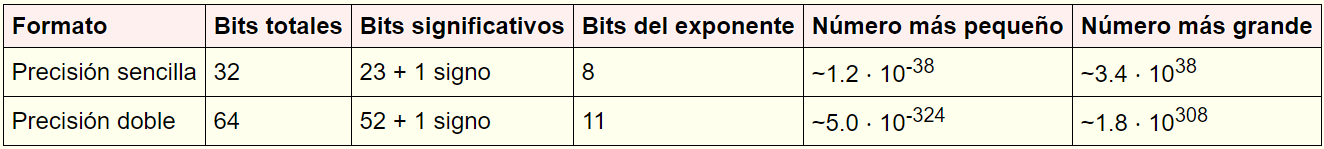

Todos los números enteros con seis o menos dígitos decimales significativos se pueden convertir a un valor de coma flotante IEEE 754 sin pérdida de precisión, algunos números enteros hasta nueve dígitos decimales significativos pueden convertirse a un valor de coma flotante IEEE 754 sin pérdida de precisión, pero no es posible con los de más de nueve dígitos decimales significativos.

### Double-precision numbers

Double-precision numbers are used when high accuracy is required. These numbers are represented by a **64-bits** (Binary digIT) lenght binary number, where the real number is stored following the next rules:

![64-bits](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/IEEE_754_Double_Floating_Point_Format.svg/618px-IEEE_754_Double_Floating_Point_Format.svg.png)

1. The fist digit (called *s*) indicates the sign of the number (s=0 means a positive number, s=1 a negative one).
2. The next 11 bits represent the exponent of the number.
3. The last  bits represent the fractional part of the number.

The formula for recovering the real number is then given by:

$$r = (-1)^s\times \left( 1 + \sum_{i=1}^{52}b_{52-i}2^{-i} \right)\times 2^{e-1023}$$

where $s$ is the sign, $b_{23-i}$ the fraction bits and $e$ is given by:

$$e = \sum_{i=0}^{10} b_{52+i}2^i$$

Double-precision system can represent real numbers within the interval $\pm 10^{-323} \cdots 10^{308}$, with $16-17$ decimal digits.

In [11]:
1e307 * 10

1e+308

In [14]:
1e307 * 20

inf

In [15]:
1e-323

1e-323

In [42]:
1e-324

0.0

### **ACTIVITY**

**1.** Write a python script that calculates the double precision number represented by a 64-bits binary.

    
**2.** What is the number represented by:

0 10000000011 1011100100001111111111111111111111111111111111111111

<font color='white'>
    **ANSWER:**  27.56640625

## Finite Arithmetic

The most basic arithmetic operations are addition and multiplication. Further operations such as subtraction, division and power are secondary as they can be reached by iteratively use the latter ones.

### Addition

<!-- As mentioned before, arithmetic operations are not exact in a computer due to the inherent limitations in number representing. Even when adding two already approximate numbers, say a single-precision couple of numbers, the result may not be a representable number, being necessary to apply approximation rules.
```python
N = 9
xe=0; x = 0; 
for i in range(N):
    xe += np.float(1.0/N)
    x += np.float16(1.0/N)
print('expected: {}; obtained: {}'.format(xe,x))
xe
```
Note that the sucessive application of rounded-off numbers produces a final result less precise.
```python
print( "5/7".format( np.float32(5/7.) ) )
print( "1/3", np.float32(1/3.) )
print( np.float32(5/7.+1/3.), 22/21. )
```
-->

In [17]:
import numpy as np
print("Error:", np.float32(5/7.+1/3.)-22/21.)

Error: 5.676632830464712e-08


Therefore, at the numerical computation level we must be aware that an expected 
zero result is really
$$0\approx 10^{-16}$$


### Multiplication

For multiplication it is applied the same round-off rules as the addition, however, be aware that multiplicative errors propagate more quickly than additive errors.

In [32]:
N = 20
xe=1; x = 1
for i in range(N):
    xe *= np.float(2.0**(1.0/N))
    x *= np.float16(2.0**(1.0/N))
print('expected: {}; obtained: {}'.format(xe,x))

expected: 2.000000000000003; obtained: 1.9958053041750938


In [ ]:
N = 20
xe=1; x = 1
for i in range(N):
    xe *= 2.0**(1.0/N)

In [51]:
np.float16(3.1415926535897932384626433832795028841971)

3.14

In [50]:
np.float32(3.1415926535897932384626433832795028841971)

3.1415927

In [54]:
np.float(3.1415926535897932384626433832795028841971)

3.141592653589793

In [49]:
np.float64(3.1415926535897932384626433832795028841971)

3.141592653589793

In [46]:
np.float128(3.1415926535897932384626433832795028841971)

3.141592653589793116

The final result has an error at the third decimal digit, one more than the case of addition.

**ACTIVITY**

Find the error associated to the finite representation in the next operations 



$$
x-u, \frac{x-u}{w}, (x-u)*v, u+v 
$$

considering the values 

$$
x = \frac{5}{7}, y = \frac{1}{3}, u = 0.71425
$$



$$
v = 0.98765\times 10^5, w = 0.111111\times 10^{-4}
$$
